Building a machine learning model to predict the price of gold based on historical data and market indicators.

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data collection and Processing

In [2]:
# loading the csv data to a pandas data frame
gold_dataset=pd.read_csv('/content/gld_price_data.csv')


In [3]:
# viewing the dataframe five row

gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# checking data points rows and colums
gold_dataset.shape

(2290, 6)

In [6]:
# informtion about data
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# here we have no missing value we can also check with
gold_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
# getting the stastical measure of data
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
# finding correlation between the data
# correlation=gold_dataset.corr()

# drop Date column for correlation
correlation = gold_dataset.drop(columns=['Date']).corr()


<Axes: >

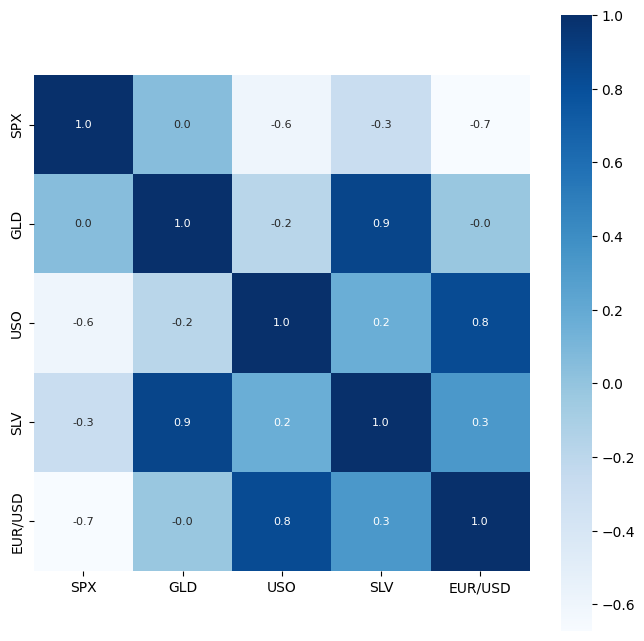

In [12]:
# constructing the heatmap for understanding the realtion
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
# correlation value of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-3905741675.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

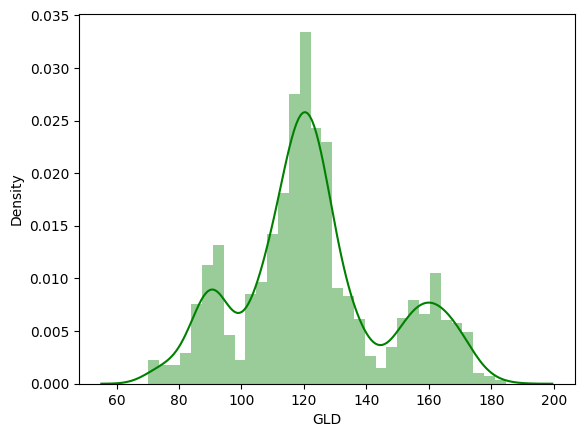

In [16]:
# checking the distribution of the Gold price
sns.distplot(gold_dataset['GLD'],color='green')

splitting the features and target

In [17]:
X=gold_dataset.drop(['Date','GLD'],axis=1)
Y=gold_dataset['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting data into test and train

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Training model

In [21]:
#loading model
model=RandomForestRegressor()

In [23]:
# training model on training data
model.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [25]:
# predicitng the value on test data
test_data_prediction=model.predict(X_test)

In [27]:
print(test_data_prediction)

[168.50029939  81.98019985 116.09460046 127.70410102 120.72660123
 155.05829694 150.02779887 126.01180065 117.4388987  126.0765006
 116.63310082 171.56610077 141.36939778 167.63179883 115.17360019
 117.72960045 139.01660279 169.88820091 159.67490318 157.17109927
 155.30190086 124.9457006  176.27479944 157.5139032  125.31960046
  93.89729979  76.85020032 120.43100024 119.03069915 167.47020014
  88.13340072 125.35930012  91.21050048 117.59170059 121.11869858
 136.38400042 115.59420128 115.53460076 145.72999951 107.32590112
 104.64610225  87.24299793 126.47950054 118.18710003 153.48099888
 119.49850001 108.34769981 108.02249823  93.22530044 127.08839782
  75.06890017 113.78199945 121.40460059 111.07399937 118.78099902
 120.53209943 158.90180061 167.17930141 147.20989731  85.79759854
  94.40630048  86.91889832  90.40200023 119.05720072 126.3589007
 127.52460023 170.0146998  122.30479944 117.3560987   98.69209987
 167.84800084 143.20229774 132.09870289 121.0445023  121.56099973
 119.7390006

In [28]:
# R squared error

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.9896275411068137


In [36]:
Y_test=list(Y_test)

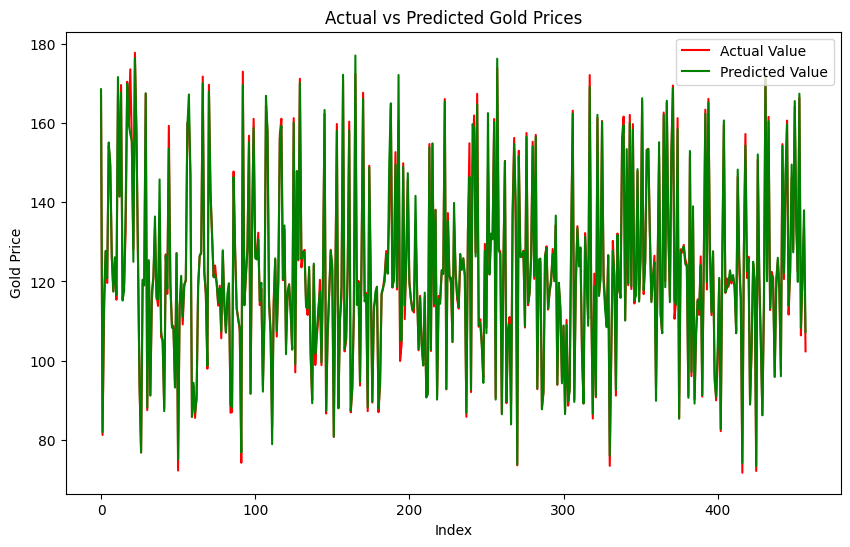

In [37]:
plt.figure(figsize=(10,6))

# Plot actual values in red
plt.plot(Y_test, color='red', label="Actual Value")

# Plot predicted values in green
plt.plot(test_data_prediction, color='green', label="Predicted Value")

plt.xlabel("Index")
plt.ylabel("Gold Price")
plt.title("Actual vs Predicted Gold Prices")
plt.legend()
plt.show()


Make predective system for user

In [40]:
# Predictive System for Gold Price

print("🔮 Gold Price Prediction System 🔮")

# Taking user input
spx = float(input("📊 Enter S&P 500 Index (SPX): "))
uso = float(input("🛢️ Enter Crude Oil Price (USO): "))
slv = float(input("🥈 Enter Silver Price (SLV): "))
eur_usd = float(input("💱 Enter EUR/USD Exchange Rate: "))

# Creating a numpy array with user input
input_data = np.array([[spx, uso, slv, eur_usd]])

# Making prediction
predicted_price = model.predict(input_data)

print("\n✅ Predicted Gold Price (GLD) is: $", round(predicted_price[0], 2))


🔮 Gold Price Prediction System 🔮
📊 Enter S&P 500 Index (SPX): 1447
🛢️ Enter Crude Oil Price (USO): 78.47
🥈 Enter Silver Price (SLV): 15.182
💱 Enter EUR/USD Exchange Rate: 1.47

✅ Predicted Gold Price (GLD) is: $ 84.88


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
